In [1]:
!nvidia-smi

Sat Dec 23 20:54:11 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 7.8 MB/s eta 0:00:00


Install YOLOV8 Model On Custom Dataset

In [1]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/78.2 GB disk)

OS                  Linux-6.1.58+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.20GHz
CUDA                12.1

matplotlib          ✅ 3.7.1>=3.3.0
numpy               ✅ 1.23.5>=1.22.2
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.1.0+cu121>=1.8.0
torchvision         ✅ 0.16.0+cu121>=0.9.0
tqdm                ✅ 4.66.1>=4.64.0
pandas              ✅ 1.5.3>=1.1.4
seaborn             ✅ 0.12.2>=0.11.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1


Train YOLOV8 Model on Custom Dataset

In [12]:
#Copied from Roboflow project
!pip install roboflow

#Enter private roboflow api key
from getpass import getpass
api_key = getpass('roboflow_api_key: ')

from roboflow import Roboflow
rf = Roboflow(api_key=api_key)
project = rf.workspace("hannahananas").project("overpass_detection")
dataset = project.version(4).download("yolov8")



roboflow_api_key: ··········
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.229, to fix: `pip install ultralytics==8.0.196`


Extracting Dataset Version Zip to Overpass_Detection-4 in yolov8:: 100%|██████████| 464/464 [00:00<00:00, 5223.76it/s]


In [ ]:
# remember to change values in the data.yaml file:
# test: /content/Overpass_Detection-4/test/images
# train: /content/Overpass_Detection-4/train/images
# val: /content/Overpass_Detection-4/valid/images

!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 408MB/s]
Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Overpass_Detection-2/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

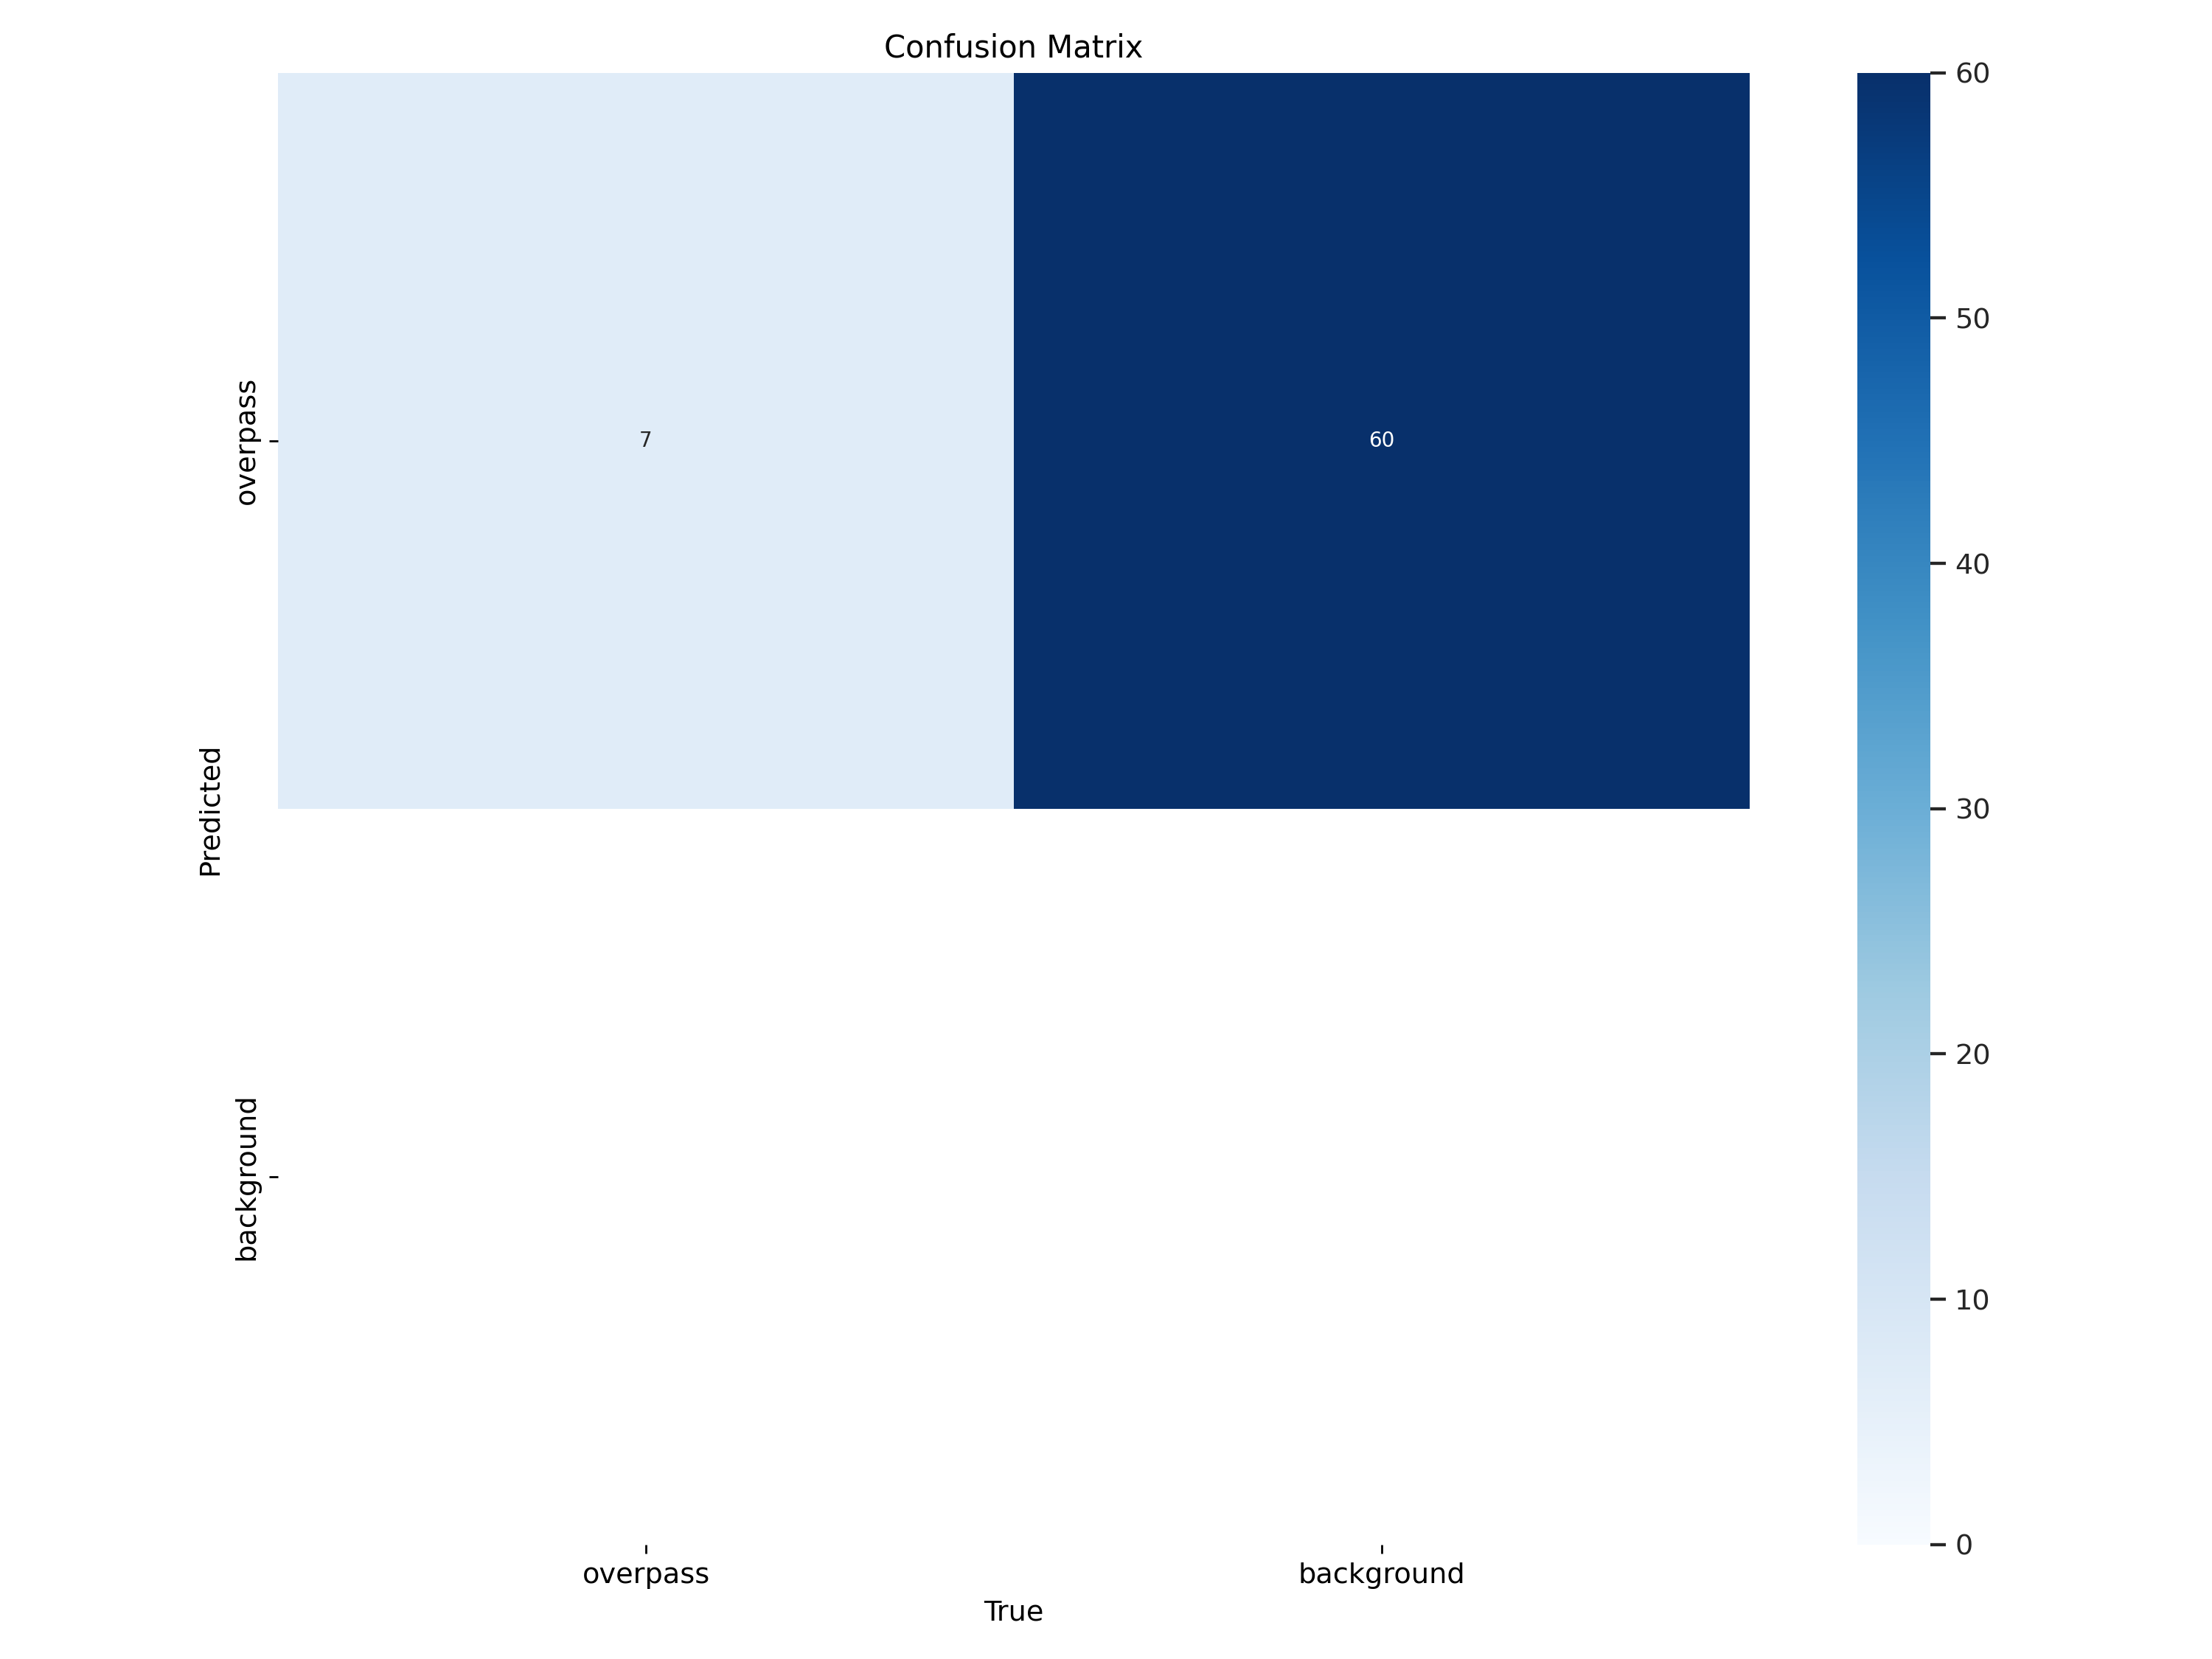

In [ ]:
#Display confusion matrix to see split of TP, FP, TN, FN detections
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

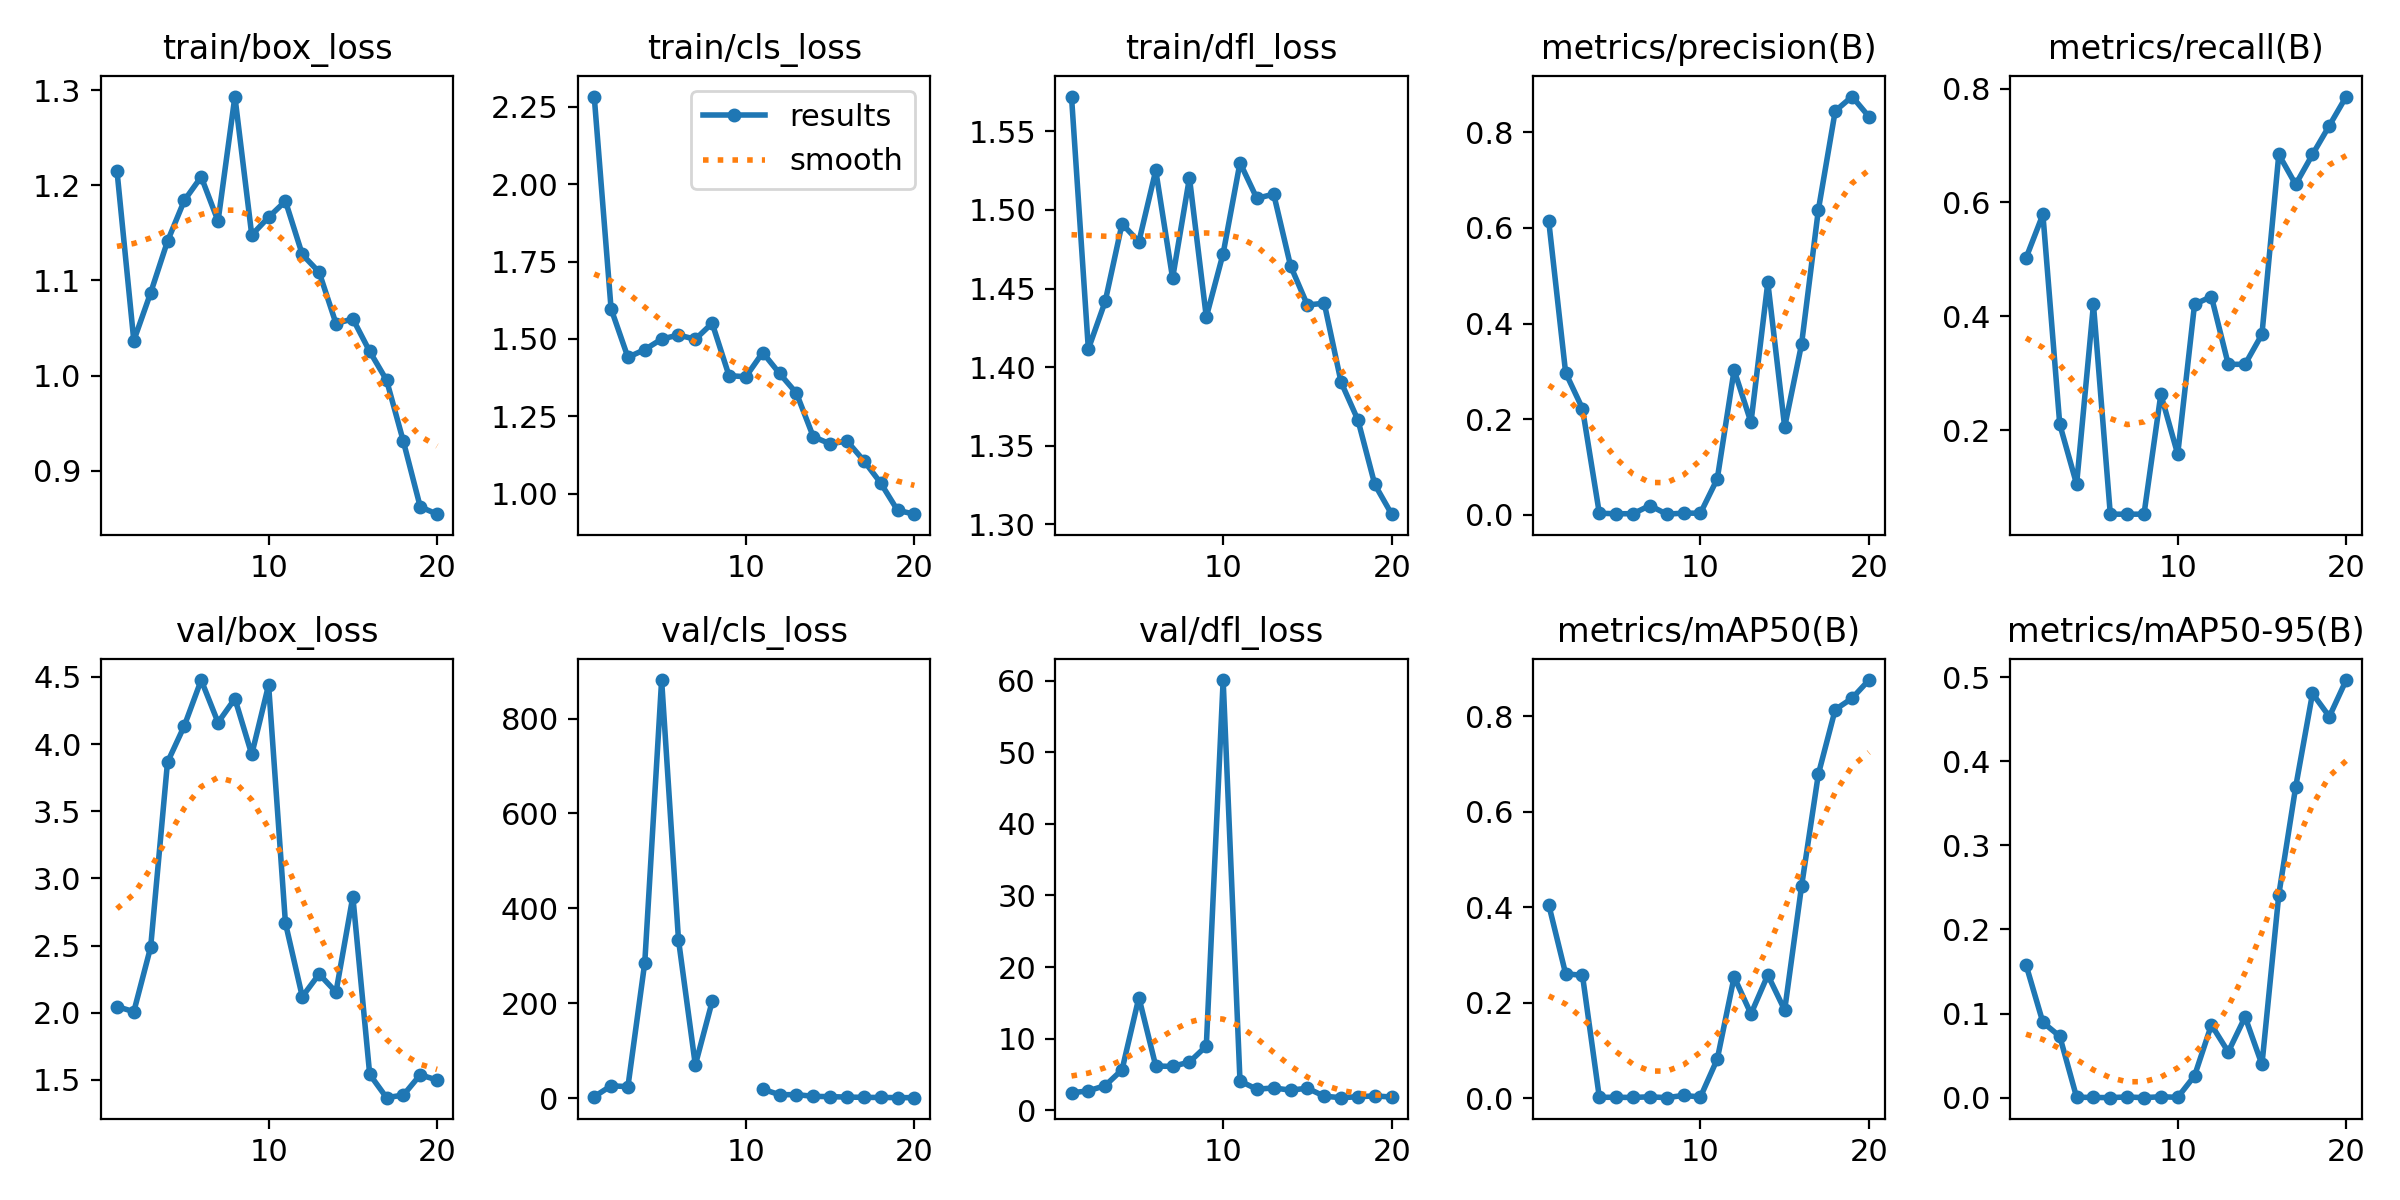

In [ ]:
#Display training results for losses, precision and recall, and mAP
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [ ]:
#Use best model to run on dataset images
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Overpass_Detection-4/valid/labels.cache... 19 images, 0 backgrounds, 0 corrupt: 100% 19/19 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.54it/s]
                   all         19         19      0.833      0.786      0.876      0.496
Speed: 0.2ms preprocess, 40.2ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/9 /content/Overpass_Detection-4/test/images/4163445950_4089ae24ac_jpg.rf.02fe99d30aa2486fda4ed3fd8b2054ca.jpg: 640x640 (no detections), 36.9ms
image 2/9 /content/Overpass_Detection-4/test/images/4836623189_597d5c0351_jpg.rf.4d2037867c770d77cd6ff2d5c093c037.jpg: 640x640 1 overpass, 32.7ms
image 3/9 /content/Overpass_Detection-4/test/images/R1_jpg.rf.40bbaf4fa16b4cecc243fc2591f64a7b.jpg: 640x640 1 overpass, 31.5ms
image 4/9 /content/Overpass_Detection-4/test/images/Screenshot-2023-10-25-230426_png.rf.dfae038642184cbff304daf794a4663c.jpg: 640x640 (no detections), 31.6ms
image 5/9 /content/Overpass_Detection-4/test/images/Screenshot-2023-10-25-230626_png.rf.5b9cfd095587423f1f5edce1db3d6076.jpg: 640x640 1 overpass, 31.5ms
image 6/9 /content/Overpass_Detection-4/test/images/Screenshot-2023-10-25-231035_png.rf.87b9749

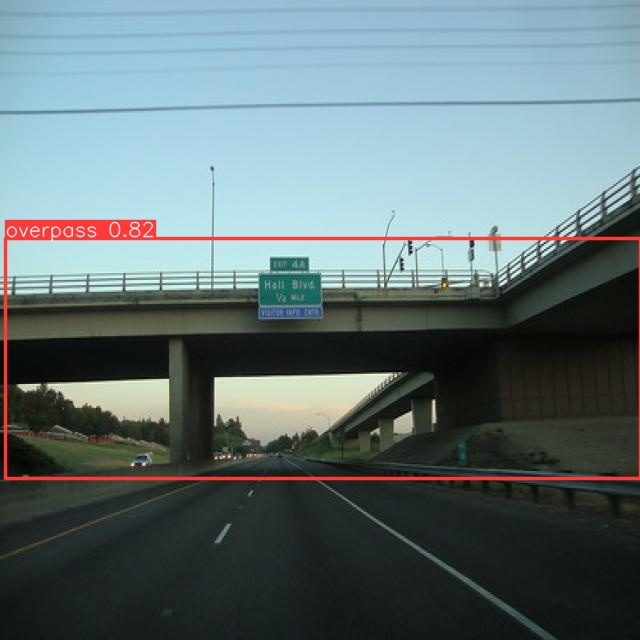

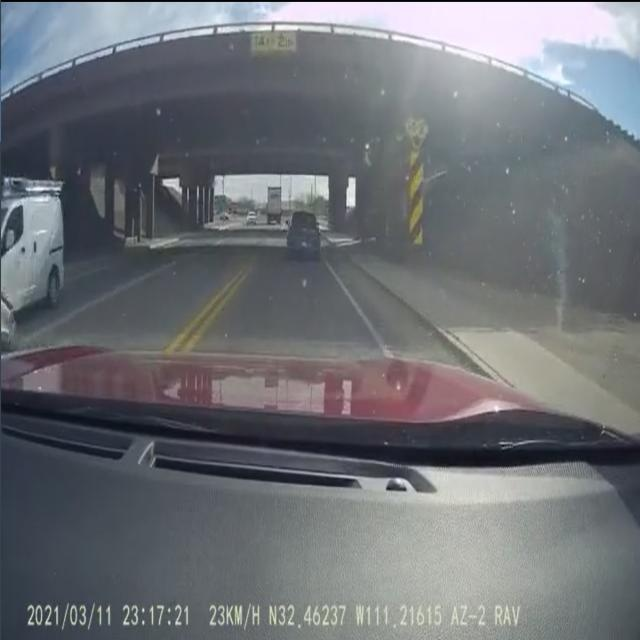

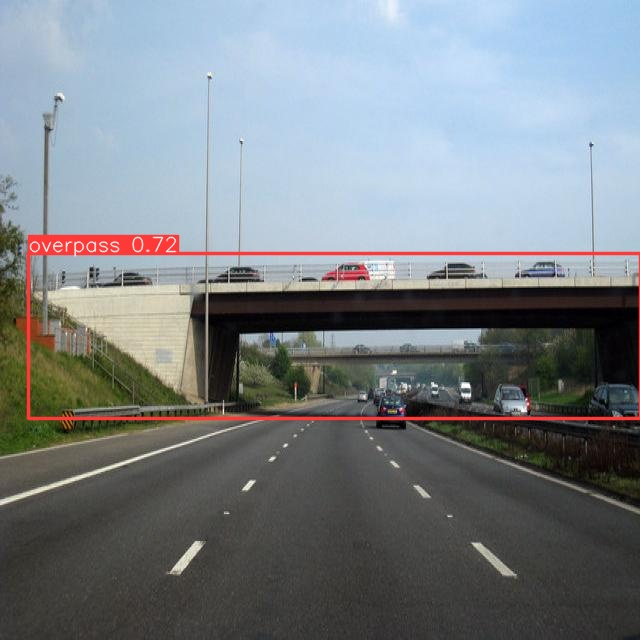

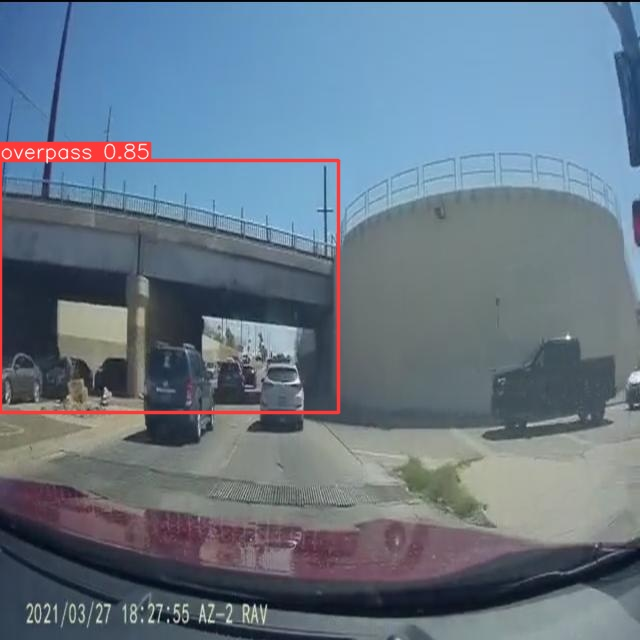

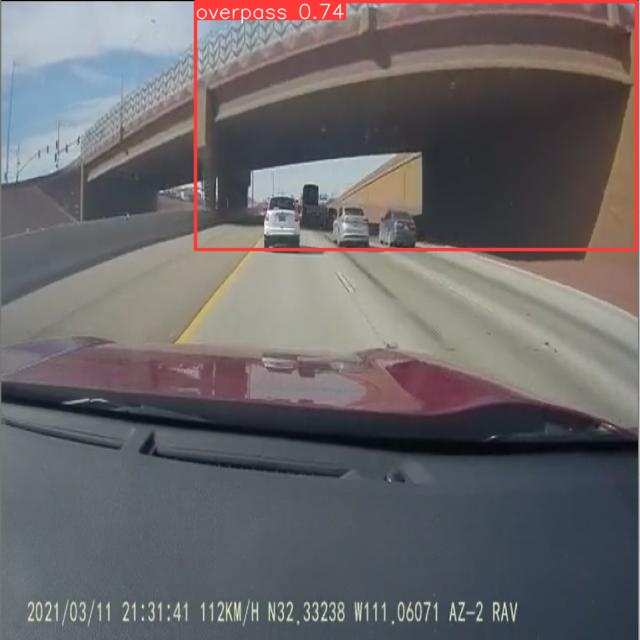

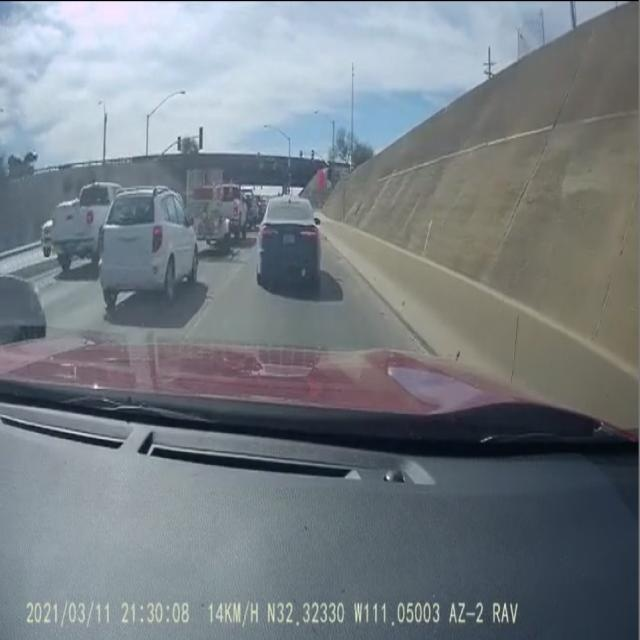

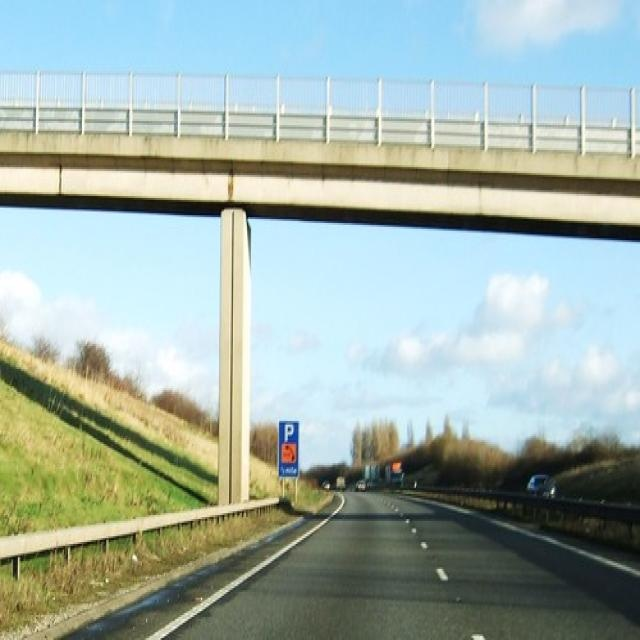

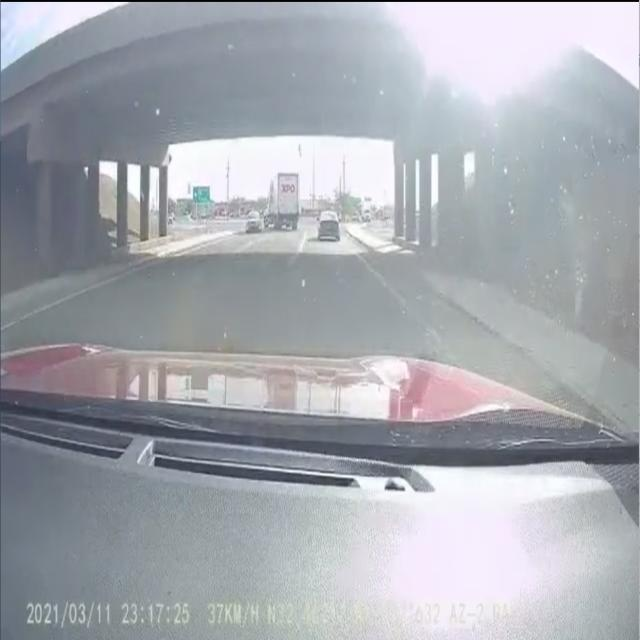

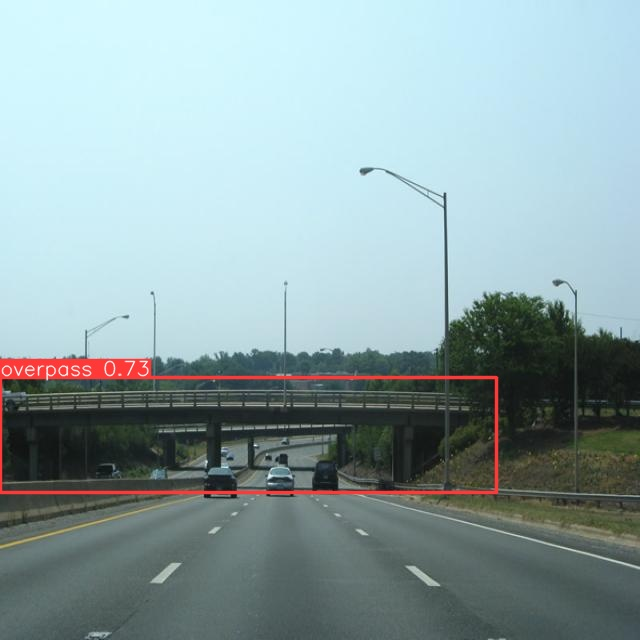

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
  display(Image(filename=image_path, height=600))
  print("\n")

In [ ]:
# !python predict.py model=yolov8n.pt source="test1.mp4"

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source="dashcam_synchronized (7).mp4" save=True

Save results into txt file, and save each conf level in individual txt files

In [ ]:
from pathlib import Path

model = YOLO('/content/runs/detect/train/weights/best.pt')
results = model.predict(source='/content/dashcam_synchronized7.mp4',
                        save=True,
                        save_txt=True,
                        save_conf=True,
                        stream=True,
                        conf=0.5)

for i, r in enumerate(results):
    if i == 0:
        save_path = Path(r.save_dir)
        basename = Path(r.path).stem
    txt_file = (save_path / (basename + f'-{str(i).zfill(5)}')).with_suffix('.txt')
    r.save_txt(txt_file)

Streaming output truncated to the last 5000 lines.
video 1/1 (59412/64408) /content/dashcam_synchronized7.mp4: 384x640 (no detections), 11.8ms
video 1/1 (59413/64408) /content/dashcam_synchronized7.mp4: 384x640 (no detections), 12.3ms
video 1/1 (59414/64408) /content/dashcam_synchronized7.mp4: 384x640 (no detections), 12.5ms
video 1/1 (59415/64408) /content/dashcam_synchronized7.mp4: 384x640 (no detections), 13.5ms
video 1/1 (59416/64408) /content/dashcam_synchronized7.mp4: 384x640 (no detections), 12.8ms
video 1/1 (59417/64408) /content/dashcam_synchronized7.mp4: 384x640 (no detections), 13.0ms
video 1/1 (59418/64408) /content/dashcam_synchronized7.mp4: 384x640 (no detections), 12.7ms
video 1/1 (59419/64408) /content/dashcam_synchronized7.mp4: 384x640 (no detections), 12.5ms
video 1/1 (59420/64408) /content/dashcam_synchronized7.mp4: 384x640 (no detections), 12.8ms
video 1/1 (59421/64408) /content/dashcam_synchronized7.mp4: 384x640 (no detections), 12.2ms
video 1/1 (59422/64408) /cont

Combine all confidence level txt output files together into one large txt file.

In [ ]:
import os

# Directory containing the text files
directory = "/content/runs/detect/predict2/labels"

# Name of the output file
output_file = "combined_confidence_levels2.txt"

# Get a list of all text files in the directory and sort them
text_files = sorted([filename for filename in os.listdir(directory) if filename.endswith(".txt")])

# Open the output file in write mode
with open(output_file, "w") as combined_file:
    for filename in text_files:
        # Construct the full path to the input file
        input_file_path = os.path.join(directory, filename)

        # Open the input file in read mode
        with open(input_file_path, "r") as input_file:
            # Read the content of the input file and write it to the output file
            content = input_file.read()
            combined_file.write(content)

Change video from .avi to .mp4

In [ ]:
!ffmpeg -i {"/content/runs/detect/predict2/dashcam_synchronized7.avi"} -vcodec libx264 {"final.mp4"}

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Copy and paste console output of detection per frame and save into a new txt file. The following code will remove lines with no detections.

In [ ]:
file_path = '/content/dashcam_synch7_5.00-7.30_console_output.txt'
string_to_delete = 'no detections'

# Open the file for reading and create a list of filtered lines
filtered_lines = []
with open(file_path, 'r') as file:
    for line in file:
        if string_to_delete not in line:
            filtered_lines.append(line)

# Open the file for writing and overwrite it with the filtered lines
with open(file_path, 'w') as file:
    file.writelines(filtered_lines)

Sort all the output files in the directory /content/runs/detect/predict#/labels

Change the file name to the frame it was detected

In [ ]:
import os

# Directory containing the text files
directory = "/content/runs/detect/predict2/labels"

# Get a list of all text files in the directory
text_files = [filename for filename in os.listdir(directory) if filename.endswith(".txt")]

# Find the maximum length of the numeric part in the file names
max_num_length = max(len(''.join(filter(str.isdigit, filename.split('_')[-1]))) for filename in text_files)

# Rename the files with padded numbers
for current_filename in text_files:
    # Extract the numeric part from the current filename
    number_part = ''.join(filter(str.isdigit, current_filename.split('_')[-1]))

    # Pad the numeric part with leading zeros
    padded_number = number_part.zfill(max_num_length)

    # Construct the new filename
    new_filename = f"{padded_number}.txt"

    # Create the full paths for the source and destination files
    source_path = os.path.join(directory, current_filename)
    destination_path = os.path.join(directory, new_filename)

    # Rename the file
    os.rename(source_path, destination_path)

Combine all the conf level txt files in the directory, display the file name and the time detected (using ffprobe to get fps) in the format (hh:mm:ss:ms)

In [ ]:
import os
import subprocess
from fractions import Fraction

!apt-get install ffmpeg

# Get the frame rate
def get_frame_rate(video_path):
    command = [
        'ffprobe',
        '-v', 'error',
        '-select_streams', 'v:0',
        '-show_entries', 'stream=r_frame_rate',
        '-of', 'default=noprint_wrappers=1:nokey=1',
        video_path
    ]

    result = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

    if result.returncode == 0:
        frame_rate = result.stdout.strip()
        return frame_rate
    else:
        return None

video_path = '/content/dashcam_synchronized7.mp4'
frame_rate = get_frame_rate(video_path)
frame_rate = float(Fraction(frame_rate))

# Directory containing the text files
directory = "/content/runs/detect/predict2/labels"

# Name of the output file
output_file = "combined_confidence_levels2.txt"

# Name of the output time file
output_time_file = "time_info.txt"

# Get a list of all text files in the directory and sort them
text_files = sorted([filename for filename in os.listdir(directory) if filename.endswith(".txt")])

# Open the output file in write mode ***added time_file
with open(output_file, "w") as combined_file, open(output_time_file, "w") as time_file:
    for i, filename in enumerate(text_files, start=1):
        # Construct the full path to the input file
        input_file_path = os.path.join(directory, filename)

        # Open the input file in read mode
        with open(input_file_path, "r") as input_file:
            # Read the content of the input file
            content = input_file.read()

            # Extract the numeric part from the filename
            number_part = ''.join(filter(str.isdigit, filename))

            # Calculate the corresponding time in seconds
            time_seconds = int(number_part) / frame_rate

            # Format the time as hh:mm:ss:ms
            hours, remainder = divmod(time_seconds, 3600)
            minutes, remainder = divmod(remainder, 60)
            seconds, milliseconds = divmod(remainder, 1)
            formatted_time = f"({int(hours):02d}:{int(minutes):02d}:{int(seconds):02d}:{int(milliseconds * 1000):03d})"
            time_only = f"{int(hours):02d}:{int(minutes):02d}:{int(seconds):02d}:{int(milliseconds * 1000):03d}"

            # Format the file name with time information
            formatted_filename = f"{filename} {formatted_time}\n"
            formatted_time_only = f"{time_only}\n"

            # Write the formatted file name and content to the output file
            combined_file.write(formatted_filename)
            combined_file.write(content)

             # Write the time information to the time file
            time_file.write(formatted_time_only)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


Extract frames where there are overpasses. Have to manually record the time frames beforehand from the video

In [ ]:
# Using dashcam_synchronized (7).mp4
# There are 3 overpasses, but pass under only 2

import subprocess
import os

def extract_frames(input_video, start_time, end_time, output_pattern, output_rate=1):
    command = [
        'ffmpeg',
        '-i', input_video,
        '-ss', start_time,
        '-to', end_time,
        '-r', f'{output_rate}',
        output_pattern
    ]

    result = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

input_video = '/content/dashcam_synchronized7.mp4'

# First instance (2 overpasses)
start_time1, end_time1 = '00:05:54:000', '00:08:08:000'
output_pattern1 = '/content/output_instance1_%03d.jpg'

# Second instance (1 overpass)
start_time2, end_time2 = '00:08:47:00', '00:09:06:00'
output_pattern2 = '/content/output_instance2_%03d.jpg'

# Extract frames every 1 second
extract_frames(input_video, start_time1, end_time1, output_pattern1, output_rate=1)
extract_frames(input_video, start_time2, end_time2, output_pattern2, output_rate=1)

Run the YOLO model onto all the extracted frames in the directory

In [ ]:
from pathlib import Path
from tqdm import tqdm

model = YOLO('/content/runs/detect/train/weights/best.pt')

images_directory = '/content/output_frames'

# Get a list of all image files in the directory
image_files = list(Path(images_directory).rglob('*.jpg')) + list(Path(images_directory).rglob('*.png'))

# Run inference on each image in the directory
for image_file in tqdm(image_files, desc='Processing images'):
    # Convert Path object to string
    image_path = str(image_file)

    # Run YOLO inference
    model.predict(image_path, save_conf=True, imgsz=320, conf=0.5)

Streaming output truncated to the last 5000 lines.

image 1/1 /content/output_frames/output_instance1_968.jpg: 192x320 (no detections), 10.6ms
Speed: 0.6ms preprocess, 10.6ms inference, 0.9ms postprocess per image at shape (1, 3, 192, 320)
Processing images:  78%|███████▊  | 6267/8040 [02:35<00:44, 39.85it/s]
image 1/1 /content/output_frames/output_instance1_801.jpg: 192x320 (no detections), 10.5ms
Speed: 0.7ms preprocess, 10.5ms inference, 0.8ms postprocess per image at shape (1, 3, 192, 320)

image 1/1 /content/output_frames/output_instance1_5639.jpg: 192x320 (no detections), 10.7ms
Speed: 0.6ms preprocess, 10.7ms inference, 0.9ms postprocess per image at shape (1, 3, 192, 320)

image 1/1 /content/output_frames/output_instance1_6979.jpg: 192x320 (no detections), 10.4ms
Speed: 0.7ms preprocess, 10.4ms inference, 0.7ms postprocess per image at shape (1, 3, 192, 320)

image 1/1 /content/output_frames/output_instance1_2483.jpg: 192x320 1 overpass, 10.3ms
Speed: 0.7ms preprocess, 10.3ms i

Count number of files in the predict folder from the result of save_conf of the extracted images. Find the accuracy rate by dividing number by total number of images that was entered for detection

In [ ]:
import os

directory_path = "/content/runs/detect/predict2"

# List all files in the directory
files = [file for file in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, file))]

# Count the number of files
num_files = len(files)

print(f"Number of files in {directory_path}: {num_files}")

Number of files in /content/runs/detect/predict2: 8040


verify if txt file of timestamps contain times that fall in the specific time frame that an overpass was detected

In [ ]:
def check_timestamps_in_timeframe(timestamp_file, start_time, end_time):
    # Read timestamps from the file
    with open(timestamp_file, 'r') as file:
        timestamps = file.readlines()

    # Check if any timestamps fall within the specified time frame
    timestamps_within_timeframe = [
        timestamp.strip() for timestamp in timestamps
        if start_time <= timestamp <= end_time
    ]

    return timestamps_within_timeframe

timestamp_file = '/content/time_info.txt'

# first instance, customize as needed
start_time1, end_time1 = '00:05:54:000', '00:08:08:000'

#second instance, customize as needed
start_time2, end_time2 = '00:08:47:00', '00:09:06:00'

timestamps_within_timeframe1 = check_timestamps_in_timeframe(timestamp_file, start_time1, end_time1)
timestamps_within_timeframe2 = check_timestamps_in_timeframe(timestamp_file, start_time2, end_time2)

if timestamps_within_timeframe1:
    print("Overpass(es) detected within the specified time frame: Yes")

if timestamps_within_timeframe2:
    print("Overpass(es) detected within the specified time frame: Yes")
else:
    print("No timestamps within the specified time frame.")

Overpass(es) detected within the specified time frame: Yes
Overpass(es) detected within the specified time frame: Yes


Display resulting video on screen (may not work if video is too large)

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/final.mp4'

# Compressed video path
compressed_path = "/content/final_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)